# National Parks Endangered Species Analysis

This project explores data from the National Parks Service, focusing on endangered species across different parks. The goal is to analyze conservation statuses, identify trends or patterns in the types of species that are at risk, and gain meaningful insights into conservation efforts.

Throughout this project, we will:
* Analyze and clean the provided datasets.
* Visualize key findings using data visualization techniques.
* Pose relevant questions and seek answers that contribute to understanding the factors impacting species conservation.

**Data Sources:** The datasets used for this project include:

* `Species_info.csv` — Contains information about species and their conservation statuses.
* `Observations.csv` — Includes observations of species across various national parks.

Both datasets were sourced from [Codecademy.com](https://www.codecademy.com).

Let’s begin by loading the necessary Python modules required for data exploration and analysis.

In [5]:
import pandas as pd  #Load the libraries we need
import numpy as np
import math
import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import ticker
sns.set_style('darkgrid')

We begin by loading the data from the file `species_info.csv` into a DataFrame named df_species. Next, we analyze the dataset to understand the kind of information it provides.

The `species_info.csv` file contains 5,824 rows and 4 columns:

- **category:** the class of the animal (e.g., Mammal, Bird, Reptile).
- **scientific_name:** the scientific name of each species.
- **common_name:** the common names of each species.
- **conservation_status:** the current conservation status of each species.

Upon analysis, we find that the number of rows (5,824) does not match the number of unique scientific names (5,541), indicating the presence of duplicates. To address this, we remove duplicates based on the **scientific_name** column while ignoring the **common_name** column, as common names may vary in spelling or phrasing.

Further examination reveals two duplicate species with differing conservation statuses. For these cases, we cross-check the accurate conservation status using [AnimalDiversity](https://animaldiversity.org) and retain only the correct rows in the DataFrame.

Finally, we handle missing values in the **conservation_status** column by replacing all NaN entries with the label 'Not Evaluated'.


In [8]:
df = pd.read_csv('species_info.csv')
display(df.head(10))
print('Initial number of lines: ', len(df))
print('Number of unique names: ', df.scientific_name.nunique(), '\n')
df = df.drop_duplicates(subset = ['category', 'scientific_name', 'conservation_status']).reset_index(drop = True) #remove duplicates
print('Species whose status should be checked: ')
display(df[df.scientific_name.duplicated(keep = False)]) #check if there are more duplicates
df = df.drop([8, 560]) # check on Animal Diversity site these rows aren't correct
print('Final number of lines: ',len(df)) 
df_species = df.fillna('Not Evaluated')
df_species = df_species.replace('Not Evaluated','1 - Not Evaluated')
df_species = df_species.replace('Species of Concern','2 - Species of Concern')
df_species = df_species.replace('Threatened','3 - Threatened')
df_species = df_species.replace('Endangered','4 - Endangered')
df_species = df_species.replace('In Recovery','5 - In Recovery')
df_species.head(10)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Initial number of lines:  5824
Number of unique names:  5541 

Species whose status should be checked: 


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3018,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3247,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


Final number of lines:  5541


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,1 - Not Evaluated
1,Mammal,Bos bison,"American Bison, Bison",1 - Not Evaluated
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",1 - Not Evaluated
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",1 - Not Evaluated
4,Mammal,Cervus elaphus,Wapiti Or Elk,1 - Not Evaluated
5,Mammal,Odocoileus virginianus,White-Tailed Deer,1 - Not Evaluated
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",1 - Not Evaluated
7,Mammal,Canis latrans,Coyote,2 - Species of Concern
9,Mammal,Canis rufus,Red Wolf,4 - Endangered
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",1 - Not Evaluated


Next, we load the second file, `observations.csv`, into a DataFrame named **df_observations** and analyze the data to understand its contents.

The `observations.csv` file contains 23,296 rows and 3 columns:

- **scientific_name**: the scientific name of each species.
- **park_name**: the name of the park where the species was observed.
- **observations**: the number of observations recorded in the past 7 days.

We observe that there are 5,541 unique species, and the data is from 4 different parks. Therefore, we would expect 5,541 species * 4 parks = 22,164 rows. However, the DataFrame contains 23,296 rows, indicating the presence of duplicate entries with varying observation counts.

To resolve this, we calculate the average number of observations for each species within each park, effectively consolidating the duplicate rows. After this adjustment, the DataFrame will contain 5,541 species * 4 parks = 22,164 rows.


In [10]:
df_observations = pd.read_csv('observations.csv')
print('Number of unique names: ', df_observations.scientific_name.nunique())
print('Data size: ',len(df_observations), '!= 4*', df_observations.scientific_name.nunique(), '= ', 4*df_observations.scientific_name.nunique())
df_observations = df_observations.groupby(['scientific_name','park_name']).observations.mean().reset_index()#remove duplicates with mean value
print('New Data size: ',len(df_observations), '= 4*Number of unique names = ', 4*df_observations.scientific_name.nunique())
df_observations.head()

Number of unique names:  5541
Data size:  23296 != 4* 5541 =  22164
New Data size:  22164 = 4*Number of unique names =  22164


,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109.0
1,Abies bifolia,Great Smoky Mountains National Park,72.0
2,Abies bifolia,Yellowstone National Park,215.0
3,Abies bifolia,Yosemite National Park,136.0
4,Abies concolor,Bryce National Park,83.0


Now that our data is cleaned, we can merge the two DataFrames and continue with the analysis.

Since the number of scientific names is consistent across both DataFrames, we can merge them into a single dataset.



In [11]:
df = pd.merge(df_observations, df_species)
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,1 - Not Evaluated
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",1 - Not Evaluated
...,...,...,...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237.0,Nonvascular Plant,Zygodon Moss,1 - Not Evaluated


In [12]:
print('\033[4m'+'Short dataframe review:'+'\033[0m')
print('Number of species: ', df.scientific_name.nunique(), '\n')
parks = df.park_name.unique()
print('Parks: ', parks, '\n')
print('Number of observations: ', df.observations.sum(), '\n')
print('Categories: ', df.category.unique(), '\n')
print('Status: ', df.conservation_status.unique())

Short dataframe review:
Number of species:  5541 

Parks:  ['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park'] 

Number of observations:  3154261.0 

Categories:  ['Vascular Plant' 'Nonvascular Plant' 'Bird' 'Amphibian' 'Reptile'
 'Mammal' 'Fish'] 

Status:  ['1 - Not Evaluated' '2 - Species of Concern' '3 - Threatened'
 '5 - In Recovery' '4 - Endangered']


First, let's take a look at the species present in our data. The pie chart reveals that the majority of species are Vascular Plants, accounting for 76% of the dataset.

            category  count
0     Vascular Plant   4262
1               Bird    488
2  Nonvascular Plant    333
3             Mammal    176
4               Fish    125
5          Amphibian     79
6            Reptile     78


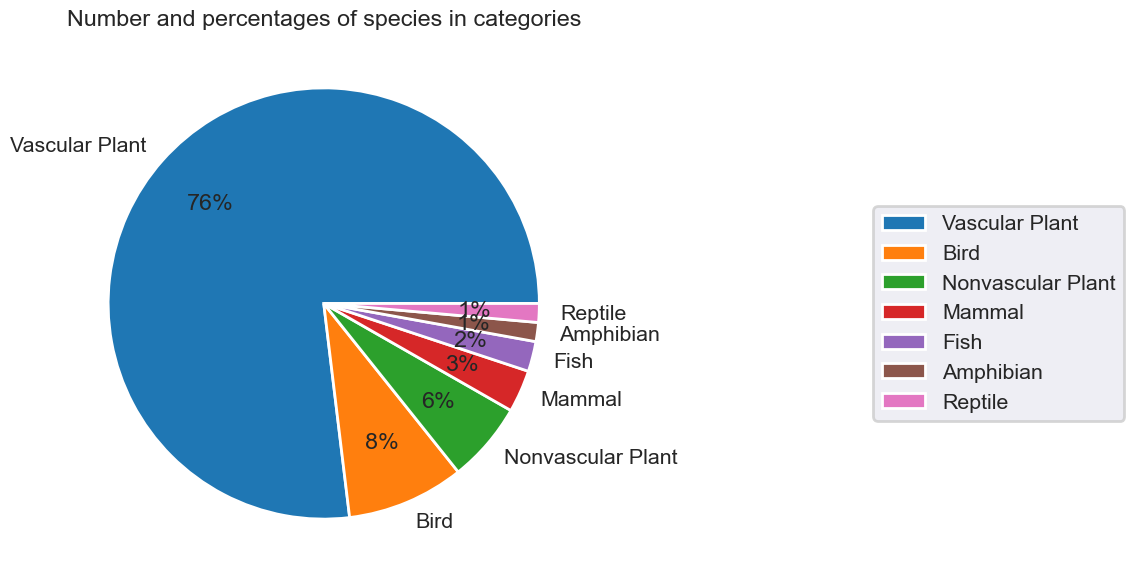

In [13]:
sns.set_context('poster',font_scale=0.7)
plt.figure(figsize = (20,7))
df_count_categories = df_species.category.value_counts().reset_index()
print(df_count_categories)
plt.pie(df_count_categories['count'], autopct = '%d%%', pctdistance = 0.7, labels = df_count_categories.category)
plt.legend(df_count_categories.category, bbox_to_anchor=(1.5,0.7))
plt.title('Number and percentages of species in categories')
plt.savefig('Species_in_categories.png')
plt.show()

Let's examine the conservation status of the species in the list.

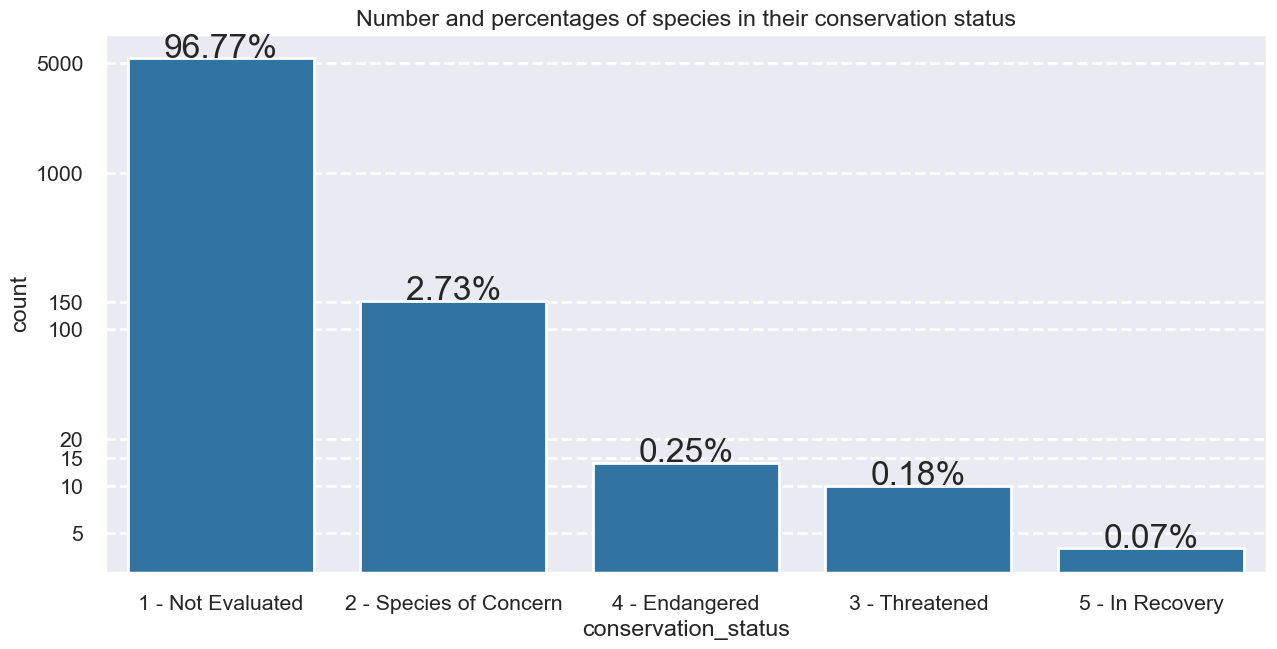

,conservation_status,number_of_species
0,1 - Not Evaluated,5362
1,2 - Species of Concern,151
2,4 - Endangered,14
3,3 - Threatened,10
4,5 - In Recovery,4
5,Total Under Protection,179


In [15]:
plt.figure(figsize = (15,7))
ax = sns.countplot(x = 'conservation_status', data = df_species) #The plot represents the number and % of species under different conservation statuses.
plt.yscale('log') #The y-axis is logarithmic for better visualization of counts with bi differences.
plt.gca().yaxis.set_major_locator(ticker.FixedLocator([0,5,10,15,20,100,150,1000,5000])) #Customizing y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FixedFormatter([0,5,10,15,20,100,150,1000,5000]))
plt.grid(True, axis = 'y',linestyle = '--')
for p in ax.patches: #annotating bars
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/5541:.2%}', (x + width/2, y + height*1.02), ha='center', size = 'x-large')
plt.title('Number and percentages of species in their conservation status')
plt.savefig('Species_in_statuses.png')
plt.show()
table2 = df_species.conservation_status.value_counts().rename_axis('conservation_status').reset_index(name = 'number_of_species')
table2.loc[5] = ['Total Under Protection',sum(table2[table2['conservation_status']!='1 - Not Evaluated'].number_of_species)]
table2

The conservation status of 96.77% of species has not been evaluated, meaning these species are not currently assigned a conservation status. Of the species that have been evaluated, about 3% are of concern.

Now, let's take a look at the categories of the 179 species that are under a conservation status.

<Figure size 3000x1500 with 0 Axes>

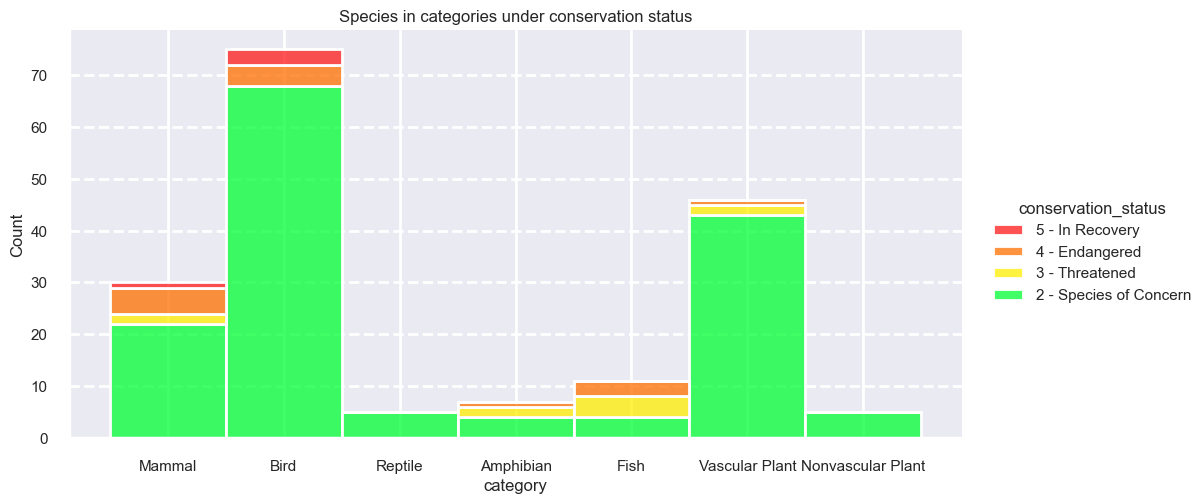

,1 - Not Evaluated,2 - Species of Concern,3 - Threatened,4 - Endangered,5 - In Recovery,Total,% species under conservation status
category,,,,,,,
Amphibian,72,4,2,1,0,79,8.86
Bird,413,68,0,4,3,488,15.37
Fish,114,4,4,3,0,125,8.80
Mammal,146,22,2,5,1,176,17.05
Nonvascular Plant,328,5,0,0,0,333,1.50
Reptile,73,5,0,0,0,78,6.41
Vascular Plant,4216,43,2,1,0,4262,1.08


In [16]:
statuses = ['1 - Not Evaluated', '2 - Species of Concern', '3 - Threatened','4 - Endangered', '5 - In Recovery']
plt.figure(figsize = (30,15))
sns.set_context('poster',font_scale=0.5)
palette = ["#FF1A1A", "#FF6F00", "#FFEE00", "#00FF33"]
#palette = ["#B22222", "#F09800", "#FFD700", "#669966"]
ax2 = sns.displot(df_species[df_species.conservation_status != 'Not Evaluated'], x ='category',
            hue='conservation_status', multiple='stack', aspect = 2, hue_order = reversed(statuses[1:]), palette=sns.color_palette(palette, len(palette)) )
plt.grid(True, axis = 'y',linestyle = '--')
plt.title('Species in categories under conservation status')
plt.savefig('At-risk_Species.png')
plt.show()
table = pd.pivot_table(df_species, values = 'scientific_name', index = ['category'], columns = ['conservation_status'], aggfunc = {'count'}, fill_value = 0)
levels = table.columns.levels#define multiindex
table.columns = levels[1]#delete multiindex
df_table = pd.DataFrame(table.to_records())#transform pivot table to dataframe
df_table = df_table.set_index(['category'])#category became index
df_table['Total'] = df_table.sum(axis=1)
df_table['% species under conservation status'] = round(df_table.drop(['1 - Not Evaluated','Total'], axis = 1).sum(axis = 1)*100/df_table.Total,2)
df_table


Looking at the percentages of species under conservation status (the last column of the table), it is clear that Mammals (17.05%) and Birds (15.37%) are in a more vulnerable state. However, as shown in the composition of the stacked bars, efforts are being made to protect these species, with some already classified as In Recovery.

Let's consider the distribution of observations. As we can see from the first plot (below), the distribution is not normal. Therefore, we decided to analyze the data for each park separately. In the second plot, we observe four distinct normal distributions.

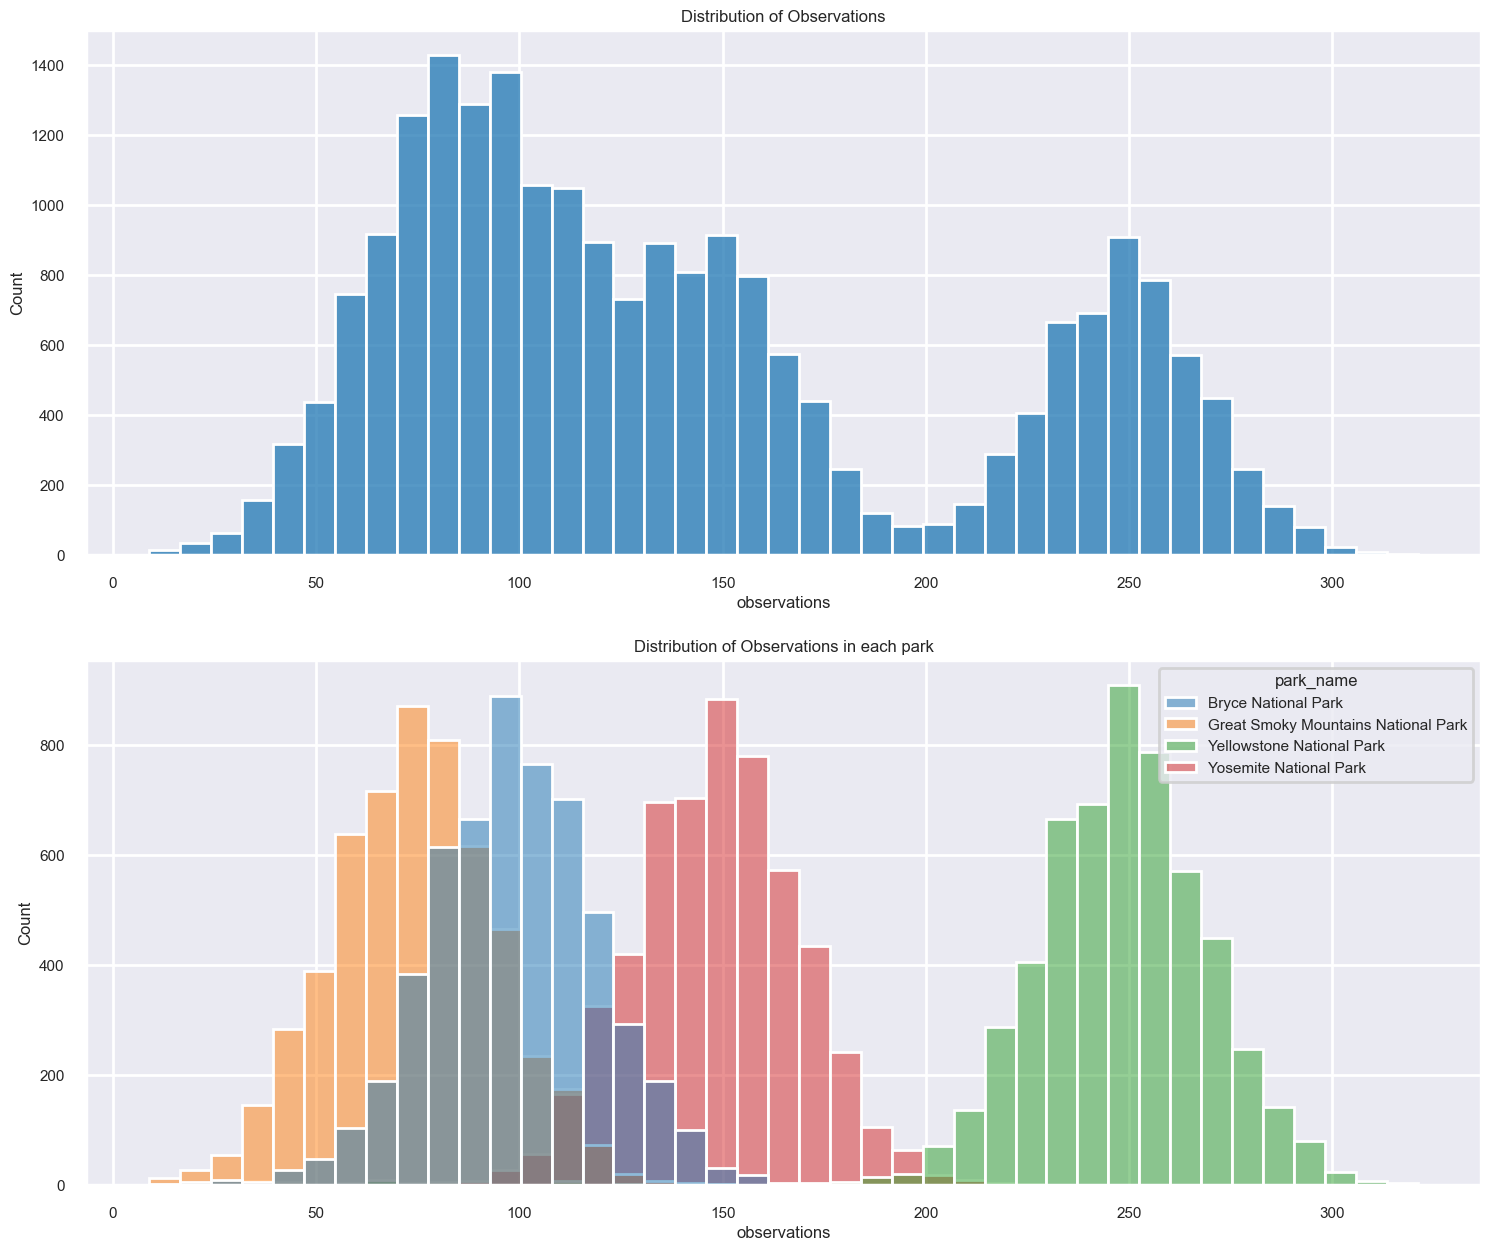

In [18]:
plt.figure(figsize = (18,15)) 
sns.set_context('poster',font_scale=0.5)
plt.figure(1)
plt.subplot(2,1,1)
sns.histplot(data = df, x = 'observations')
plt.title('Distribution of Observations')
plt.subplot(2,1,2)
sns.histplot(data = df, x = 'observations', hue = 'park_name')
plt.title('Distribution of Observations in each park')
plt.savefig('dist_observ.png')
plt.show()


The position of each distribution of observations relative to the others is influenced by the number of observations. Notably, Yellowstone National Park stands out with more observations compared to the other parks. This discrepancy can be attributed to the varying sizes of the parks, with Yellowstone being the largest among them.

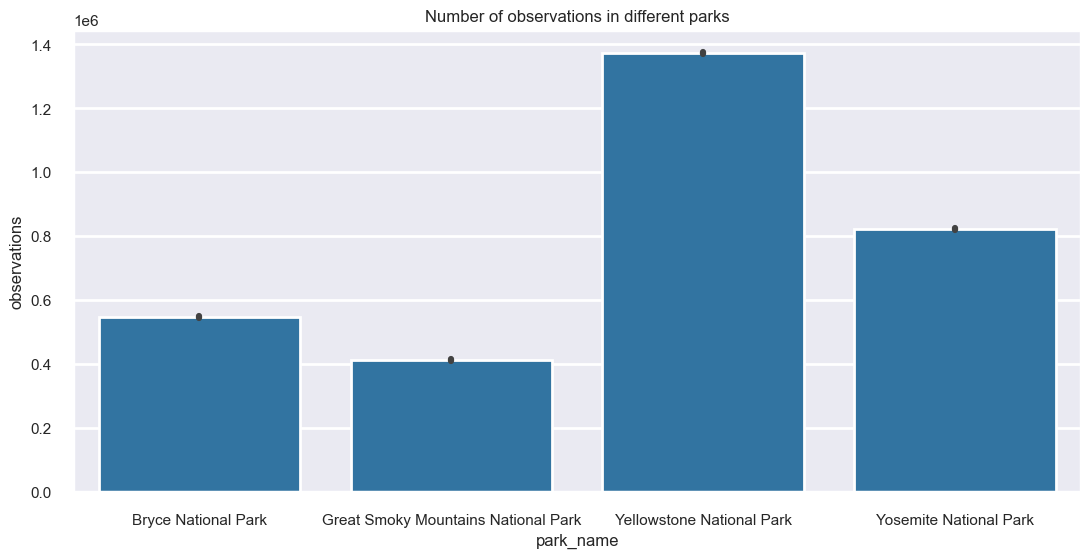

In [23]:
plt.figure(figsize = (13,6))
sns.barplot(data = df, x = 'park_name', y = 'observations', estimator = np.sum)
plt.title('Number of observations in different parks')
plt.show()

 Therefore, further we will look at the distribution of observations for each park separately. 

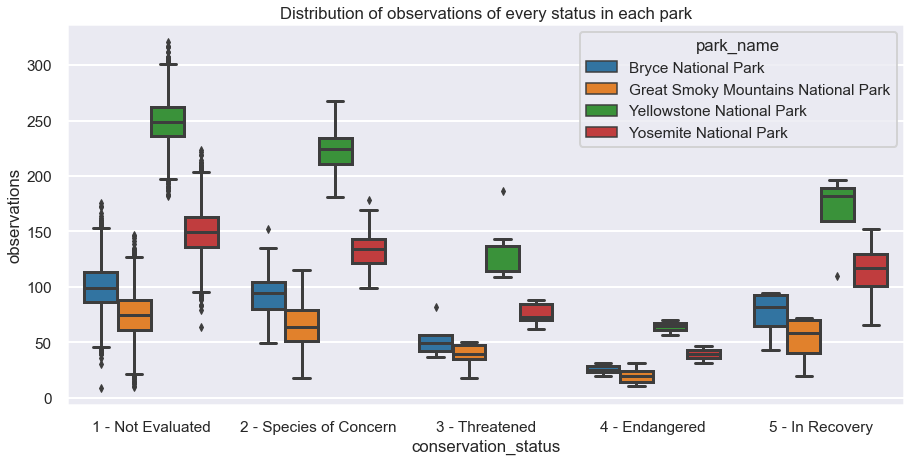

Bryce National Park
std  1 - Not Evaluated  =  20.063363520975283
std  2 - Species of Concern  =  18.51005224523449
std  3 - Threatened  =  12.58928115501437
std  4 - Endangered  =  3.308153193402689
std  5 - In Recovery  =  20.37972849017703
Great Smoky Mountains National Park
std  1 - Not Evaluated  =  19.76650816930022
std  2 - Species of Concern  =  18.95065195007612
std  3 - Threatened  =  9.695359714832659
std  4 - Endangered  =  6.0781475427156595
std  5 - In Recovery  =  21.17978596051748
Yellowstone National Park
std  1 - Not Evaluated  =  19.687562741569234
std  2 - Species of Concern  =  18.207534290181812
std  3 - Threatened  =  22.724656213021134
std  4 - Endangered  =  3.907084094622098
std  5 - In Recovery  =  33.80366104433069
Yosemite National Park
std  1 - Not Evaluated  =  19.89884156932027
std  2 - Species of Concern  =  15.726257075849885
std  3 - Threatened  =  8.498382198983522
std  4 - Endangered  =  4.745029622926392
std  5 - In Recovery  =  31.12474899497183


In [461]:
plt.figure(figsize = (15,7)) 
plt.title('Distribution of observations of every status in each park')
sns.boxplot(data = df, x = 'conservation_status', y = 'observations', hue = 'park_name', order = statuses)
plt.savefig('obs_boxplot.png')
plt.show()
table1 = pd.pivot_table(df, values = 'observations', index = 'scientific_name', columns = 'conservation_status')
for park in parks:
    table = pd.pivot_table(df[df.park_name == park], values = 'observations', index = 'scientific_name', columns = 'conservation_status')
    print(park)
    for status in statuses:
        print('std ', status, ' = ', np.std(table[status]))

The boxplot illustrates the relationship between the number of observations and the conservation status of the species. We analyze each park individually. Species not under any conservation status show the highest number of observations, as evidenced by the tallest boxplot. Species classified as "2 - Species of Concern" exhibit a moderate number of observations, with a smaller range compared to the previous group. The "3 - Threatened" species have an even lower boxplot, reflecting fewer observations. The species categorized as "4 - Endangered," which carries the highest risk of extinction in the wild, show the smallest number of observations. In contrast, species in the "5 - In Recovery" status exhibit an increase in the number of observations, as their boxplot is higher than that of the "Endangered" species.

However, applying statistical testing to our data is not appropriate, as the variances between datasets should be equal (std1/std2 ~ 1), and we observe significant differences in the variances.

The conservation status of a species reflects its current survival and the likelihood of extinction in the near future. When assessing this status, a variety of factors are considered, not just the number of individuals remaining, but also the overall trend in population growth or decline over time, breeding success rates, and known threats. In our dataset, we only have information about the number of individuals remaining (observations), and we observe a strong correlation between the number of observations and the conservation status.

Given this, we will create a list of species for each park that require attention to prevent their status from worsening. In my view, this list should include species whose observation counts are significantly lower than the group’s typical values, particularly those that fall within the IQR (Interquartile Range) of a more at-risk status. We will focus on the following conservation statuses: Species of Concern, Threatened, and Endangered. Let’s examine the boxplot for these statuses specifically.

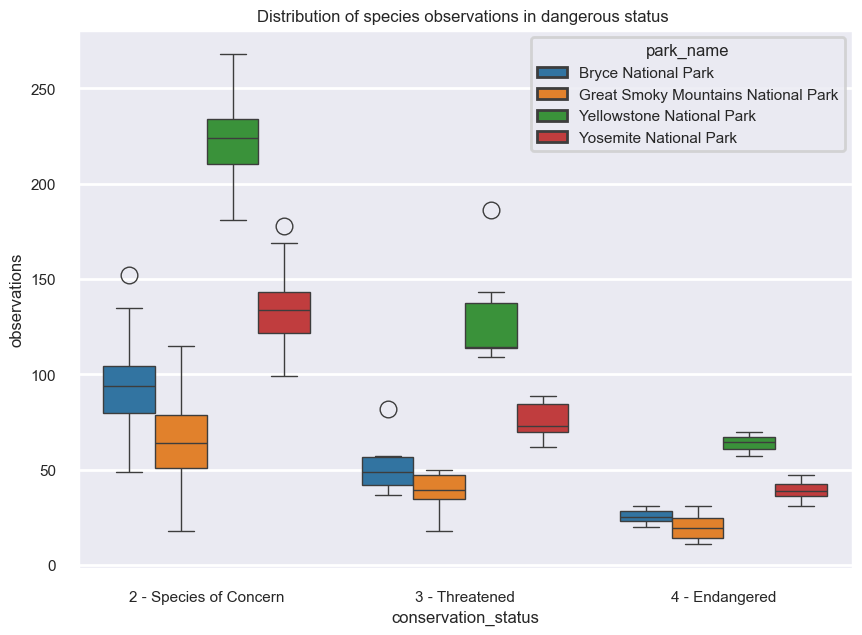

,2 - Species of Concern,3 - Threatened,4 - Endangered
park_name,,,
Bryce National Park,104.50,56.50,28.50
Great Smoky Mountains National Park,78.75,47.25,24.50
Yellowstone National Park,234.00,137.25,67.00
Yosemite National Park,143.50,84.25,42.75


In [24]:
plt.figure(figsize = (10,7))
df_danger = df[(df.conservation_status=='2 - Species of Concern')|(df.conservation_status=='3 - Threatened')|(df.conservation_status=='4 - Endangered')]
sns.boxplot(data = df_danger, x = 'conservation_status', y = 'observations', hue = 'park_name', order = statuses[1:4])
plt.title('Distribution of species observations in dangerous status ')
plt.savefig('warn_status.png')
plt.show()
#table_dangQ1 = pd.pivot_table(df_danger, values=['observations'], index = ['park_name'], columns = ['conservation_status'],
                          #  aggfunc ={'observations': (lambda x: np.quantile(x,0.25))})#table of quartiles Q1
table_dangQ3 = pd.pivot_table(df_danger, values=['observations'], index = ['park_name'], columns = ['conservation_status'],
                            aggfunc ={'observations': (lambda x: np.quantile(x,0.75))})#table of quartiles Q3
#df_Q1 = pd.DataFrame(table_dangQ1.to_records())
#df_Q1 = df_Q1.set_index(['park_name'])
#df_Q1.columns = statuses[1:4]
df_Q3 = pd.DataFrame(table_dangQ3.to_records())
df_Q3 = df_Q3.set_index(['park_name'])
df_Q3.columns = statuses[1:4]
display(df_Q3)


In [26]:
df_danger_copy = df_danger[['scientific_name','park_name','conservation_status','observations']].copy()#copy for 3 needed columns
for status in statuses[1:4]:
    name = 'Q3 '+status
    df_danger_copy[status] = df_danger_copy.apply(lambda x: df_Q3.loc[x.park_name, status], axis = 1)#add value Q3 in table
df_danger_copy['warning'] = df_danger_copy.apply(lambda x: '!!!' if ((x.conservation_status == '2 - Species of Concern')&(x.observations<x['3 - Threatened']))|
                                                     ((x.conservation_status == '3 - Threatened')&(x.observations<x['4 - Endangered'])) else 'OK', axis = 1)
df_danger_copy = df_danger_copy[df_danger_copy.warning == '!!!']
dict_warning = {}
for park in parks:
    dict_warning[park] = df_danger_copy[df_danger_copy.park_name == park].scientific_name.values.tolist()
pprint.pprint(dict_warning)

{'Bryce National Park': ['Cathartes aura',
                         'Cottus bairdii',
                         'Piranga rubra',
                         'Plagiomnium carolinianum',
                         'Rallus elegans'],
 'Great Smoky Mountains National Park': ['Achnatherum contractum',
                                         'Asio flammeus',
                                         'Botrychium ascendens',
                                         'Buteo lineatus',
                                         'Cardamine clematitis',
                                         'Cathartes aura',
                                         'Chlidonias niger',
                                         'Contopus cooperi',
                                         'Coturnicops noveboracensis',
                                         'Cygnus buccinator',
                                         'Elanoides forficatus',
                                         'Erimonax monachus',
                    

# Сonclusions:

* The provided datasets contain information from four national parks (Yellowstone National Park, Yosemite National Park, Bryce National Park, and Great Smoky Mountains National Park), covering 5,541 species with various conservation statuses (Species of Concern, Threatened, Endangered, and In Recovery), along with the number of observations from the past 7 days.
* 76% of the observed species are vascular plants, while the remainder consists of nonvascular plants, mammals, birds, fishes, amphibians, and reptiles.
* Approximately 97% of all species have not been assigned a conservation status, with only 179 species classified as protected (those with a conservation status).
* Mammals and birds are in the most at-risk categories.
* Observations in each park follow a normal distribution.
* A correlation between conservation status and the number of observations was observed through the construction of boxplots for each park. However, statistical testing on this data is inappropriate, as the variances across the datasets are not equal.
* Based on our analysis, we have compiled a list of species that each park should monitor to prevent their status from worsening. These species are outlined in the dictionary named dict_warning.

# Further research:
   * Since the distribution of observations is not normal, we analyzed the data for each park separately. Given the size of the parks, we could potentially normalize the data by calculating the number of observations per square meter, allowing for a more comparable analysis across all parks.
   * The conservation status of a species takes into account many factors, not just the number of individuals remaining. Therefore, further research would benefit from data on population trends over time to better assess the status and predict future conservation needs.